# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from prefixspan import PrefixSpan

# Load DataBase 

In [2]:
df= pd.read_csv('WH90_17.csv')
#df=df[['2017','2016','2015','2014','2013','2012','2011','2010']]


# SAX Implementation

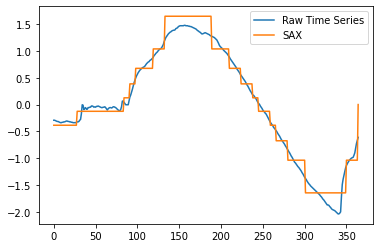

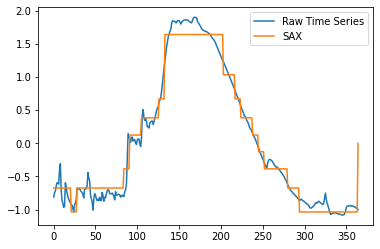

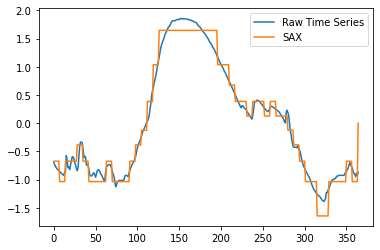

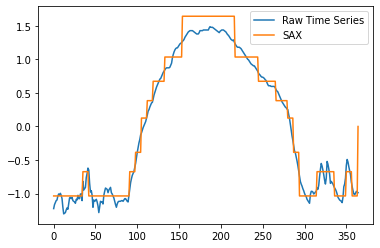

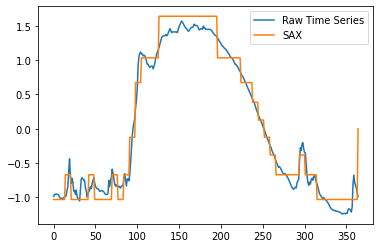

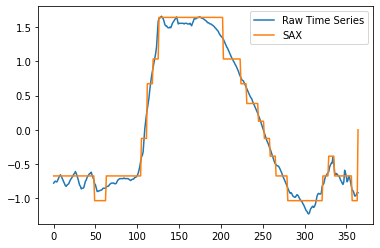

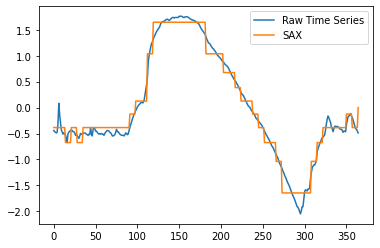

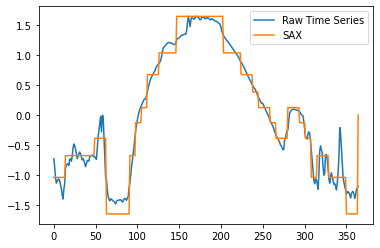

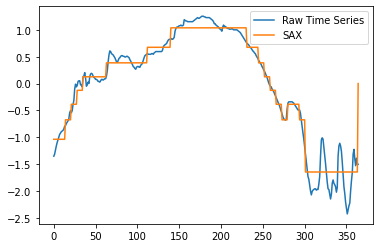

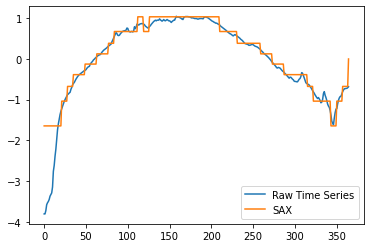

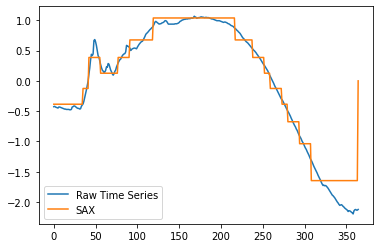

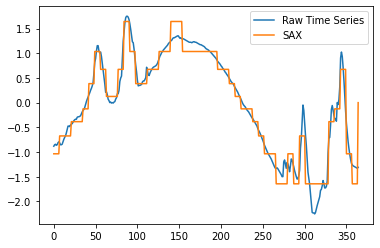

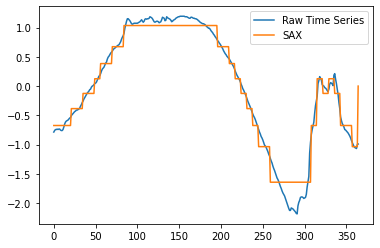

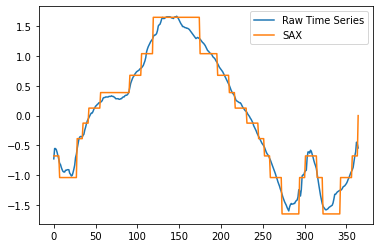

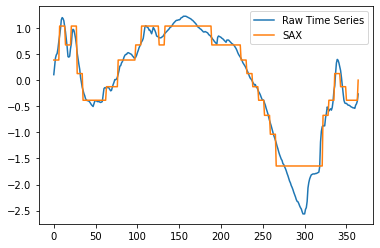

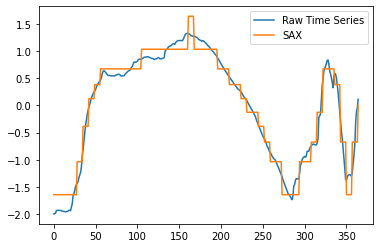

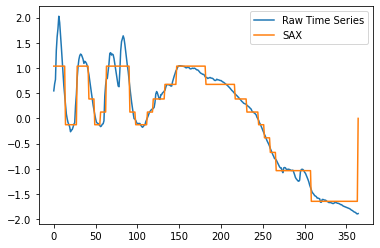

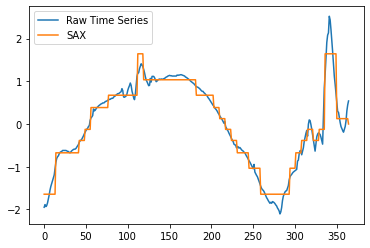

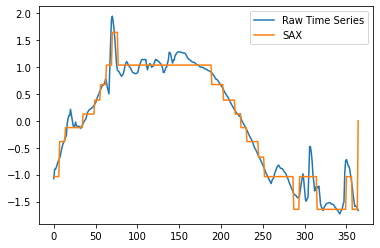

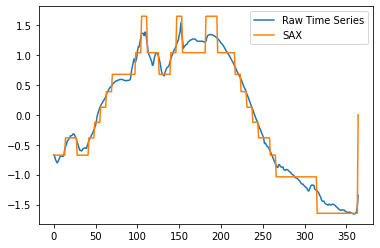

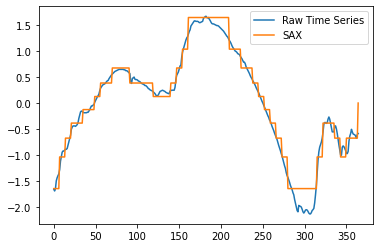

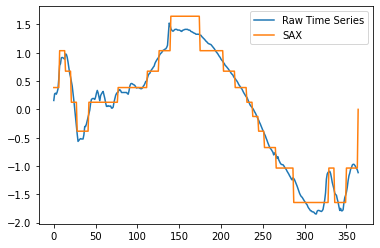

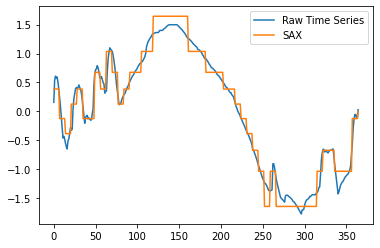

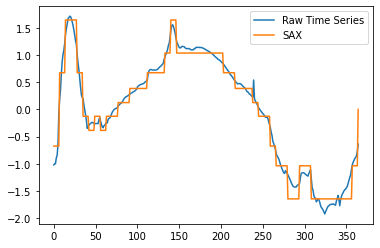

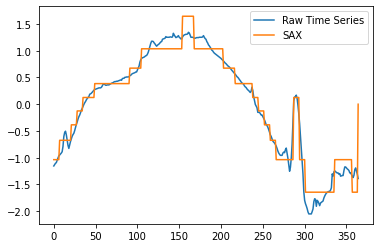

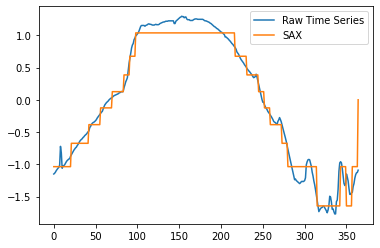

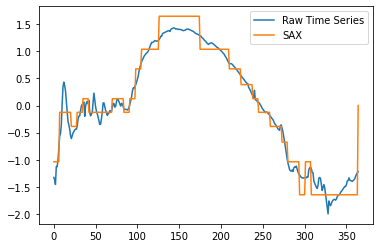

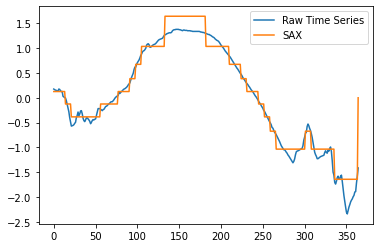

In [20]:
segment = 52
symbole = 10
anne = 2017
dict = {}
for i in range(df.shape[1]):
    df_Series=df.iloc[:,i]
    dataset = df_Series.values
    dataset=dataset.reshape(1, 365)
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
    dataset = scaler.fit_transform(dataset)

    sax = SymbolicAggregateApproximation(n_segments= segment,  alphabet_size_avg=symbole)
    sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
    dict[anne] = sax.fit_transform(dataset)
    anne = anne - 1
    plt.plot(dataset[0].ravel(),label='Raw Time Series')
    plt.plot(sax_dataset_inv[0].ravel(), label='SAX')
    plt.legend(loc='best')
    plt.show()

# DATA Append

In [21]:
df1 = pd.DataFrame.from_dict(dict[2017].reshape(1,segment))
df2 = pd.DataFrame.from_dict(dict[2016].reshape(1,segment)) 
df3 = pd.DataFrame.from_dict(dict[2015].reshape(1,segment)) 
df4 = pd.DataFrame.from_dict(dict[2014].reshape(1,segment)) 
df5 = pd.DataFrame.from_dict(dict[2013].reshape(1,segment)) 
df6 = pd.DataFrame.from_dict(dict[2012].reshape(1,segment)) 
df7 = pd.DataFrame.from_dict(dict[2011].reshape(1,segment)) 
df8 = pd.DataFrame.from_dict(dict[2010].reshape(1,segment)) 
df9 = pd.DataFrame.from_dict(dict[2009].reshape(1,segment)) 
df10 = pd.DataFrame.from_dict(dict[2008].reshape(1,segment)) 
df11 = pd.DataFrame.from_dict(dict[2007].reshape(1,segment)) 
df12 = pd.DataFrame.from_dict(dict[2006].reshape(1,segment)) 
df13 = pd.DataFrame.from_dict(dict[2005].reshape(1,segment)) 
df14 = pd.DataFrame.from_dict(dict[2004].reshape(1,segment)) 
df15 = pd.DataFrame.from_dict(dict[2003].reshape(1,segment)) 
df16 = pd.DataFrame.from_dict(dict[2002].reshape(1,segment)) 
df17 = pd.DataFrame.from_dict(dict[2001].reshape(1,segment)) 
df18 = pd.DataFrame.from_dict(dict[2000].reshape(1,segment)) 
df19 = pd.DataFrame.from_dict(dict[1999].reshape(1,segment)) 
df20 = pd.DataFrame.from_dict(dict[1998].reshape(1,segment)) 
df21 = pd.DataFrame.from_dict(dict[1997].reshape(1,segment)) 
df22 = pd.DataFrame.from_dict(dict[1996].reshape(1,segment)) 
df23 = pd.DataFrame.from_dict(dict[1995].reshape(1,segment)) 
df24 = pd.DataFrame.from_dict(dict[1994].reshape(1,segment)) 
df25 = pd.DataFrame.from_dict(dict[1993].reshape(1,segment)) 
df26 = pd.DataFrame.from_dict(dict[1992].reshape(1,segment)) 
df27 = pd.DataFrame.from_dict(dict[1991].reshape(1,segment)) 
df28 = pd.DataFrame.from_dict(dict[1990].reshape(1,segment)) 

In [22]:
data = df1.append([df2, df3, df4 , df5 , df6 , df7 ,df8,df9,df10,df11,df12,
                   df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,
                   df24,df25,df26,df27,df28])
data.head()

/tmp/ipykernel_5373/2942317159.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df1.append([df2, df3, df4 , df5 , df6 , df7 ,df8,df9,df10,df11,df12,


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,3,3,3,3,4,4,4,4,4,4,...,1,0,0,0,0,0,0,0,1,1
0,2,2,2,1,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
0,2,1,2,2,3,2,1,1,1,2,...,2,1,1,0,0,1,1,1,2,1
0,1,1,1,1,1,2,1,1,1,1,...,1,1,1,2,2,2,1,1,2,1
0,1,1,2,1,1,1,2,1,1,1,...,3,2,2,1,1,1,1,1,1,1


# Save SAX Data 

In [23]:
#data.to_csv(f'SAX{segment}_{symbole}.csv',index=False, encoding='utf-8')

# Discovery Motifs

In [24]:
#Convert data to list 
saxlist = data.values.tolist()
prs = np.array(saxlist)
prs[1]

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 6, 6, 6, 7, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 6, 6, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
min_sup = 2

ps = PrefixSpan(prs)
ps.minlen = 30
ps.maxlen = 52

a= ps.frequent(min_sup)
for i in range (len(a)):
        print(f"{a[i][0]} : {a[i][1]}")

KeyboardInterrupt: 